In [1]:
import os
import time
import librosa
import warnings
import librosa.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
from glob import glob

country_folder = "./mp3/Country"
rnb_folder = "./mp3/R&B"
love_song_folder = "./mp3/LoveSong"

country_file = glob(country_folder + "/*.mp3")
rnb_file = glob(rnb_folder + "/*.mp3")
love_song_file = glob(love_song_folder + "/*.mp3")

In [3]:
audio_file = []
audio_file.extend(country_file)
audio_file.extend(rnb_file)
audio_file.extend(love_song_file)

In [7]:
! conda install -c conda-forge ffmpeg -y

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\yangwang\Anaconda3\envs\tf-gpu-cuda

  added / updated specs:
    - ffmpeg


The following NEW packages will be INSTALLED:

  ffmpeg             conda-forge/win-64::ffmpeg-4.3.1-ha925a31_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [8]:
signal, sr = librosa.load("Halo.mp3")

# Waveform

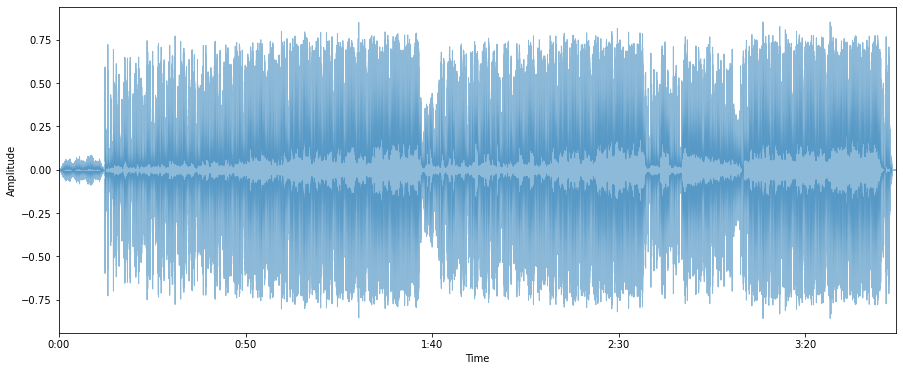

In [9]:
plt.rcParams["figure.figsize"] = 15, 6
librosa.display.waveplot(signal, sr=sr, alpha=0.5)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

# Spectrum - Fast Fourier Transform

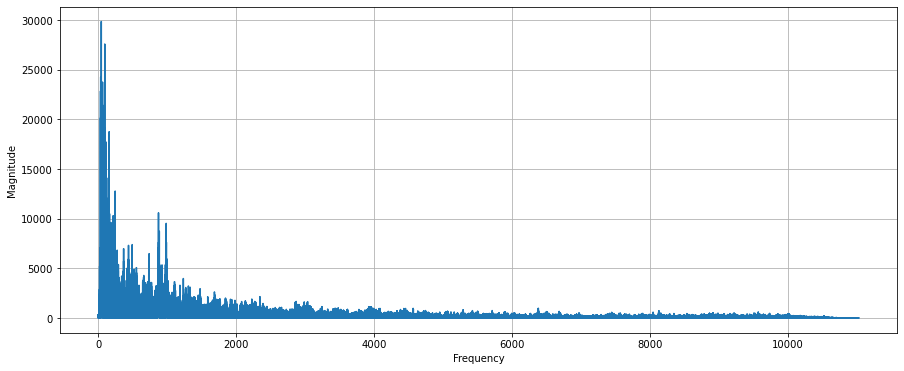

In [10]:
fft = np.fft.fft(signal)
magnitude = np.absolute(fft)
frequency = np.linspace(0, sr, len(magnitude))
left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(magnitude)/2)]

plt.plot(left_frequency, left_magnitude, color="tab:blue")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.grid()
plt.show()

# Spectrogram - Short Time Fourier Transform

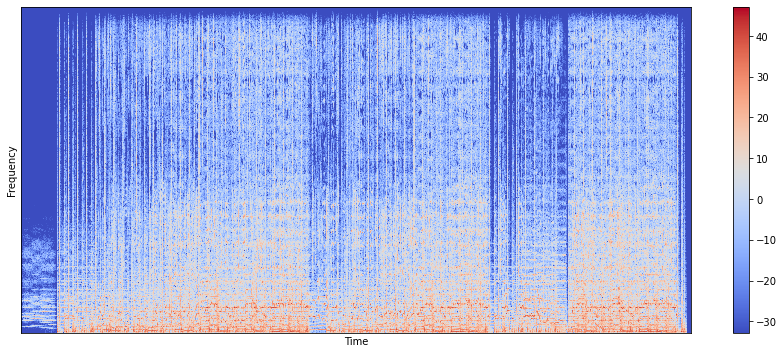

In [11]:
n_fft = 2048
hop_length = 512

stft = librosa.core.stft(signal, n_fft=n_fft, hop_length=hop_length)
spectrogram = np.abs(stft)
log_spectrogram = librosa.amplitude_to_db(spectrogram)

librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

# MFCC

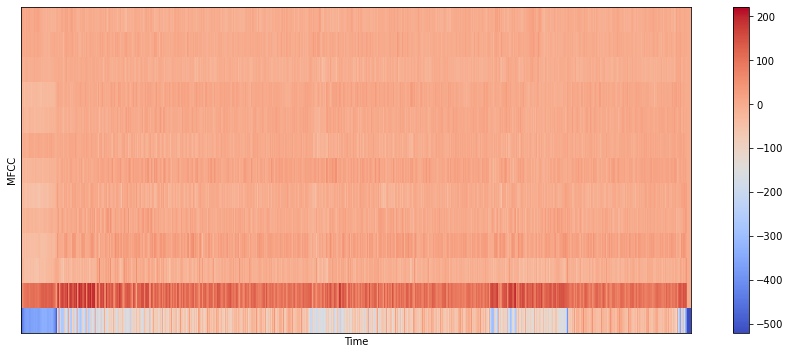

In [12]:
mfcc = librosa.feature.mfcc(signal, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)
librosa.display.specshow(mfcc, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC")
plt.colorbar()
plt.show()

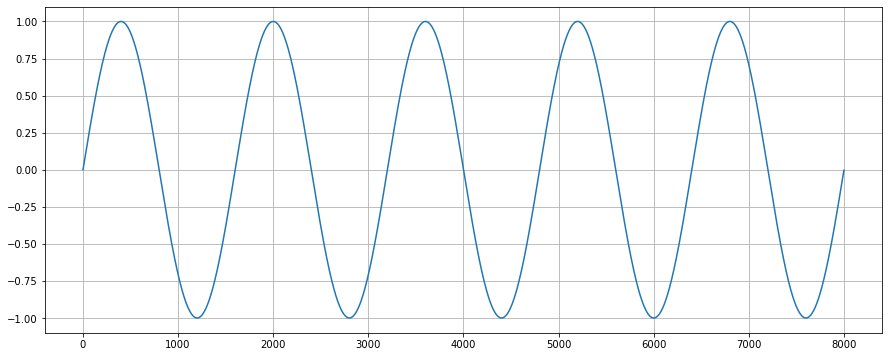

In [13]:
Fs = 8000
f = 5
sample = 8000
x = np.arange(sample)
y = np.sin(2 * np.pi * f * x / Fs)
plt.plot(x, y)
plt.xlabel('')
plt.ylabel('')
plt.grid()
plt.show()

# Pre-processing

In [8]:
import os
import json
import math

In [44]:
DATASETPATH = "mp3"
JSONPATH = "data.json"

def save_mfcc(dataset_path, json_path, sr=22050, duration=30, n_mfcc=13, n_fft=2048, hop_length=512, num_segment=5):
    data = {
        "mapping": [], 
        "mfcc": [], 
        "labels": []
    }
    samples_per_track = sr * duration
    num_samples_per_segment = int(samples_per_track / num_segment)
    expected_num_mfcc_vectors_per_segment = math.ceil(num_samples_per_segment / hop_length)
    
    # Loop through all the genre folders
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        if dirpath is not dataset_path:
            # Save semantic labels
            dirpath_components = dirpath.split("/")
            semantic_label = dirpath_components[-1]
            data["mapping"].append(semantic_label)
            print(f"\nProcessing {semantic_label}")
            
            # Process files for a specific genres
            for f in filenames:
                file_path = os.path.join(dirpath, f)
                signal, sr = librosa.load(file_path, sr=sr)
                
                # Process segments extracting mfcc and store data
                for s in range(num_segment):
                    start_sample = num_samples_per_segment * s
                    finish_sample = start_sample + num_samples_per_segment
                    mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample], 
                                                sr=sr, 
                                                n_mfcc=13, 
                                                n_fft=2048, 
                                                hop_length=512)
                    mfcc = mfcc.T
                    
                    # Store mfcc for segment if it has the expected length
                    if len(mfcc) == expected_num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print(f"{file_path} | segments: {s+1}")
    
    # Save data to a json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)
                
save_mfcc(DATASETPATH, JSONPATH)


Processing mp3\Country
mp3\Country\Aaron Tippin - You've Got To Stand For Something - Country.mp3 | segments: 1
mp3\Country\Aaron Tippin - You've Got To Stand For Something - Country.mp3 | segments: 2
mp3\Country\Aaron Tippin - You've Got To Stand For Something - Country.mp3 | segments: 3
mp3\Country\Aaron Tippin - You've Got To Stand For Something - Country.mp3 | segments: 4
mp3\Country\Aaron Tippin - You've Got To Stand For Something - Country.mp3 | segments: 5
mp3\Country\Alabama - Song Of The South - Country.mp3 | segments: 1
mp3\Country\Alabama - Song Of The South - Country.mp3 | segments: 2
mp3\Country\Alabama - Song Of The South - Country.mp3 | segments: 3
mp3\Country\Alabama - Song Of The South - Country.mp3 | segments: 4
mp3\Country\Alabama - Song Of The South - Country.mp3 | segments: 5
mp3\Country\Alan Jackson - Where Were You - Country.mp3 | segments: 1
mp3\Country\Alan Jackson - Where Were You - Country.mp3 | segments: 2
mp3\Country\Alan Jackson - Where Were You - Country

mp3\Country\John Denver - Take Me Home Country Roads - Country.mp3 | segments: 1
mp3\Country\John Denver - Take Me Home Country Roads - Country.mp3 | segments: 2
mp3\Country\John Denver - Take Me Home Country Roads - Country.mp3 | segments: 3
mp3\Country\John Denver - Take Me Home Country Roads - Country.mp3 | segments: 4
mp3\Country\John Denver - Take Me Home Country Roads - Country.mp3 | segments: 5
mp3\Country\Johnny Cash - I Walk The Line - Country.mp3 | segments: 1
mp3\Country\Johnny Cash - I Walk The Line - Country.mp3 | segments: 2
mp3\Country\Johnny Cash - I Walk The Line - Country.mp3 | segments: 3
mp3\Country\Johnny Cash - I Walk The Line - Country.mp3 | segments: 4
mp3\Country\Johnny Cash - I Walk The Line - Country.mp3 | segments: 5
mp3\Country\Kacey Musgraves - Follow Your Arrow - Country.mp3 | segments: 1
mp3\Country\Kacey Musgraves - Follow Your Arrow - Country.mp3 | segments: 2
mp3\Country\Kacey Musgraves - Follow Your Arrow - Country.mp3 | segments: 3
mp3\Country\Kacey

mp3\Country\Trace Adkins - You're Gonna Miss This - Country.mp3 | segments: 1
mp3\Country\Trace Adkins - You're Gonna Miss This - Country.mp3 | segments: 2
mp3\Country\Trace Adkins - You're Gonna Miss This - Country.mp3 | segments: 3
mp3\Country\Trace Adkins - You're Gonna Miss This - Country.mp3 | segments: 4
mp3\Country\Trace Adkins - You're Gonna Miss This - Country.mp3 | segments: 5
mp3\Country\Travis Tritt - It's a Great Day to be Alive - Country.mp3 | segments: 1
mp3\Country\Travis Tritt - It's a Great Day to be Alive - Country.mp3 | segments: 2
mp3\Country\Travis Tritt - It's a Great Day to be Alive - Country.mp3 | segments: 3
mp3\Country\Travis Tritt - It's a Great Day to be Alive - Country.mp3 | segments: 4
mp3\Country\Travis Tritt - It's a Great Day to be Alive - Country.mp3 | segments: 5
mp3\Country\Vince Gill - Go Rest High On That Mountain - Country.mp3 | segments: 1
mp3\Country\Vince Gill - Go Rest High On That Mountain - Country.mp3 | segments: 2
mp3\Country\Vince Gill -

mp3\LoveSong\Goo Goo Dolls - Iris - Love Song.mp3 | segments: 1
mp3\LoveSong\Goo Goo Dolls - Iris - Love Song.mp3 | segments: 2
mp3\LoveSong\Goo Goo Dolls - Iris - Love Song.mp3 | segments: 3
mp3\LoveSong\Goo Goo Dolls - Iris - Love Song.mp3 | segments: 4
mp3\LoveSong\Goo Goo Dolls - Iris - Love Song.mp3 | segments: 5
mp3\LoveSong\Helado Negro - Imagining What To Do - Love Song.mp3 | segments: 1
mp3\LoveSong\Helado Negro - Imagining What To Do - Love Song.mp3 | segments: 2
mp3\LoveSong\Helado Negro - Imagining What To Do - Love Song.mp3 | segments: 3
mp3\LoveSong\Helado Negro - Imagining What To Do - Love Song.mp3 | segments: 4
mp3\LoveSong\Helado Negro - Imagining What To Do - Love Song.mp3 | segments: 5
mp3\LoveSong\Jai Paul - Do You Love Her Now - Love Song.mp3 | segments: 1
mp3\LoveSong\Jai Paul - Do You Love Her Now - Love Song.mp3 | segments: 2
mp3\LoveSong\Jai Paul - Do You Love Her Now - Love Song.mp3 | segments: 3
mp3\LoveSong\Jai Paul - Do You Love Her Now - Love Song.mp3 | s

mp3\LoveSong\Shania Twain - You’re Still The One - Love Song.mp3 | segments: 1
mp3\LoveSong\Shania Twain - You’re Still The One - Love Song.mp3 | segments: 2
mp3\LoveSong\Shania Twain - You’re Still The One - Love Song.mp3 | segments: 3
mp3\LoveSong\Shania Twain - You’re Still The One - Love Song.mp3 | segments: 4
mp3\LoveSong\Shania Twain - You’re Still The One - Love Song.mp3 | segments: 5
mp3\LoveSong\Sigrid - Mine Right Now - Love Song.mp3 | segments: 1
mp3\LoveSong\Sigrid - Mine Right Now - Love Song.mp3 | segments: 2
mp3\LoveSong\Sigrid - Mine Right Now - Love Song.mp3 | segments: 3
mp3\LoveSong\Sigrid - Mine Right Now - Love Song.mp3 | segments: 4
mp3\LoveSong\Sigrid - Mine Right Now - Love Song.mp3 | segments: 5
mp3\LoveSong\Stevie Wonder - You Are The Sunshine Of My Life - Love Song.mp3 | segments: 1
mp3\LoveSong\Stevie Wonder - You Are The Sunshine Of My Life - Love Song.mp3 | segments: 2
mp3\LoveSong\Stevie Wonder - You Are The Sunshine Of My Life - Love Song.mp3 | segments:

mp3\R&B\Jazmine Sullivan - On It - R&B.mp3 | segments: 1
mp3\R&B\Jazmine Sullivan - On It - R&B.mp3 | segments: 2
mp3\R&B\Jazmine Sullivan - On It - R&B.mp3 | segments: 3
mp3\R&B\Jazmine Sullivan - On It - R&B.mp3 | segments: 4
mp3\R&B\Jazmine Sullivan - On It - R&B.mp3 | segments: 5
mp3\R&B\Jazmine Sullivan - Pick Up Your Feelings - R&B.mp3 | segments: 1
mp3\R&B\Jazmine Sullivan - Pick Up Your Feelings - R&B.mp3 | segments: 2
mp3\R&B\Jazmine Sullivan - Pick Up Your Feelings - R&B.mp3 | segments: 3
mp3\R&B\Jazmine Sullivan - Pick Up Your Feelings - R&B.mp3 | segments: 4
mp3\R&B\Jazmine Sullivan - Pick Up Your Feelings - R&B.mp3 | segments: 5
mp3\R&B\Jhené Aiko - Summer 2020 - R&B.mp3 | segments: 1
mp3\R&B\Jhené Aiko - Summer 2020 - R&B.mp3 | segments: 2
mp3\R&B\Jhené Aiko - Summer 2020 - R&B.mp3 | segments: 3
mp3\R&B\Jhené Aiko - Summer 2020 - R&B.mp3 | segments: 4
mp3\R&B\Jhené Aiko - Summer 2020 - R&B.mp3 | segments: 5
mp3\R&B\Jodeci - Freek'N You - R&B.mp3 | segments: 1
mp3\R&B\Jode

mp3\R&B\Usher - SexBeat - R&B.mp3 | segments: 1
mp3\R&B\Usher - SexBeat - R&B.mp3 | segments: 2
mp3\R&B\Usher - SexBeat - R&B.mp3 | segments: 3
mp3\R&B\Usher - SexBeat - R&B.mp3 | segments: 4
mp3\R&B\Usher - SexBeat - R&B.mp3 | segments: 5
mp3\R&B\YK Osiris - Ride - R&B.mp3 | segments: 1
mp3\R&B\YK Osiris - Ride - R&B.mp3 | segments: 2
mp3\R&B\YK Osiris - Ride - R&B.mp3 | segments: 3
mp3\R&B\YK Osiris - Ride - R&B.mp3 | segments: 4
mp3\R&B\YK Osiris - Ride - R&B.mp3 | segments: 5


In [9]:
def load_data(json_path):
    with open(json_path, "r") as fp:
        data = json.load(fp)
        
    features = np.array(data["mfcc"])
    targets = np.array(data["labels"])
    
    return features, targets

In [11]:
JSONPATH = "data.json"
features, targets = load_data(JSONPATH)

In [12]:
from sklearn.model_selection import train_test_split

X_trainvalid, X_test, y_trainvalid, y_test = train_test_split(features, targets, test_size=0.1, stratify=targets)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainvalid, y_trainvalid, test_size=0.125, stratify=y_trainvalid)

In [355]:
import tez
import torch
import torch.nn as nn
from sklearn import metrics, model_selection, preprocessing
from tez.callbacks import EarlyStopping
from tez import enums
from tez.utils import AverageMeter
from torch.utils.data import Dataset
from torch.nn import functional as F
from collections import defaultdict
from tqdm import tqdm

In [356]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

In [387]:
class SongGenreMLPClassifier(tez.Model):
    def __init__(self, num_classes):
        super().__init__()
        self.dropout = nn.Dropout(0.1)
        self.fc1 = nn.Linear(259*13, 128)
        self.out = nn.Linear(128, num_classes)
        self.step_scheduler_after = "epoch"
        self.num_classes = num_classes
        self.history = defaultdict(list)

    def monitor_metrics(self, outputs, targets):
        if targets is None:
            return {}
        outputs = torch.argmax(outputs, dim=1).cpu().detach().numpy()
        targets = targets.cpu().detach().numpy()
        accuracy = metrics.accuracy_score(targets, outputs)
        return {"accuracy": accuracy}

    def fetch_optimizer(self):
        opt = torch.optim.Adam(self.parameters(), lr=3e-4)
        return opt

    def fetch_scheduler(self):
        sch = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(
            self.optimizer, T_0=10, T_mult=1, eta_min=1e-6, last_epoch=-1
        )
        return sch

    def train_one_epoch(self, data_loader):
        self.train()
        self.model_state = enums.ModelState.TRAIN
        losses = AverageMeter()
        tk0 = tqdm(data_loader, total=len(data_loader))
        for b_idx, data in enumerate(tk0):
            self.train_state = enums.TrainingState.TRAIN_STEP_START
            loss, metrics = self.train_one_step(data)
            self.train_state = enums.TrainingState.TRAIN_STEP_END
            losses.update(loss.item(), data_loader.batch_size)
            if b_idx == 0:
                metrics_meter = {k: AverageMeter() for k in metrics}
            monitor = {}
            for m_m in metrics_meter:
                metrics_meter[m_m].update(metrics[m_m], data_loader.batch_size)
                monitor[m_m] = metrics_meter[m_m].avg
            self.current_train_step += 1
            tk0.set_postfix(loss=losses.avg, stage="train", **monitor)
        tk0.close()
        self.update_metrics(losses=losses, monitor=monitor)
        for k, v in monitor.items():
            self.history[f"train_{k}"].append(v)
        self.history["train_loss"].append(losses.avg)
        return losses.avg

    def validate_one_epoch(self, data_loader):
        self.eval()
        self.model_state = enums.ModelState.VALID
        losses = AverageMeter()
        tk0 = tqdm(data_loader, total=len(data_loader))
        for b_idx, data in enumerate(tk0):
            self.train_state = enums.TrainingState.VALID_STEP_START
            with torch.no_grad():
                loss, metrics = self.validate_one_step(data)
            self.train_state = enums.TrainingState.VALID_STEP_END
            losses.update(loss.item(), data_loader.batch_size)
            if b_idx == 0:
                metrics_meter = {k: AverageMeter() for k in metrics}
            monitor = {}
            for m_m in metrics_meter:
                metrics_meter[m_m].update(metrics[m_m], data_loader.batch_size)
                monitor[m_m] = metrics_meter[m_m].avg
            tk0.set_postfix(loss=losses.avg, stage="valid", **monitor)
            self.current_valid_step += 1
        tk0.close()
        self.update_metrics(losses=losses, monitor=monitor)
        for k, v in monitor.items():
            self.history[f"valid_{k}"].append(v)
        self.history["valid_loss"].append(losses.avg)
        return losses.avg
    
    def forward(self, feature, target=None):
        target = target.long().to(self.device)
        x = feature.reshape(feature.shape[0], -1)
        x = F.relu(self.fc1(x))
        outputs = self.out(self.dropout(x))
        outputs = outputs.float().to(self.device)

        if target is not None:
            loss = nn.CrossEntropyLoss()(outputs, target)
            metrics = self.monitor_metrics(outputs, target)
            return outputs, loss, metrics
        
        return outputs, None, None
    
    def score(self, test_dataset, n_jobs=0):
        
        def softmax(x):
            return np.exp(x) / np.sum(np.exp(x), axis=0)
        
        prediction = self.predict(test_dataset, n_jobs=n_jobs)
        prediction = list(prediction)
        prediction = softmax(np.vstack(prediction))
        prediction = np.argmax(prediction, axis=1)
        groud_truth = test_dataset[:]["target"].detach().numpy().astype(np.int64)
        return metrics.accuracy_score(prediction, groud_truth)
    
    def plot_history(self):
        from matplotlib.ticker import MaxNLocator
        
        train_loss, valid_loss = self.history["train_loss"], self.history["valid_loss"]
        train_accuracy, valid_accuracy = self.history["train_accuracy"], self.history["valid_accuracy"]

        plt.rcParams["figure.figsize"] = 15, 6
        ax1 = plt.subplot(2, 1, 1)
        ax1.plot(range(1, len(train_loss)+1), train_loss, color="tab:blue", label="train")
        ax1.plot(range(1, len(valid_loss)+1), valid_loss, color="tab:orange", label="valid")
        ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
        ax1.title.set_text('Loss')
        ax1.grid()
        ax2 = plt.subplot(2, 1, 2)
        ax2.plot(range(1, len(train_accuracy)+1), train_accuracy, color="tab:blue", label="train")
        ax2.plot(range(1, len(valid_accuracy)+1), valid_accuracy, color="tab:orange", label="valid")
        ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
        ax2.title.set_text('Accuracy')
        ax2.grid()
        plt.tight_layout()
        plt.show()

In [388]:
class SongGenreDataset(Dataset):
    
    def __init__(self, features, targets):
        self.features = features
        self.targets = targets

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        target = self.targets[idx]
        target = np.array(target)
        target = target.astype(np.float64)
        feature = self.features[idx]
        feature = np.array([feature])
        feature = feature.astype(np.float64)
        feature = np.expand_dims(feature, axis=1)
        sample = {
            'feature': torch.from_numpy(feature).float(), 
            'target': torch.from_numpy(target)}
        return sample

In [389]:
train_dataset = SongGenreDataset(X_train, y_train)
valid_dataset = SongGenreDataset(X_valid, y_valid)
test_dataset = SongGenreDataset(X_test, y_test)

In [390]:
train_dataset[0]

{'feature': tensor([[[[-649.3899,    0.0000,    0.0000,  ...,    0.0000,    0.0000,
               0.0000],
           [-649.3899,    0.0000,    0.0000,  ...,    0.0000,    0.0000,
               0.0000],
           [-649.3899,    0.0000,    0.0000,  ...,    0.0000,    0.0000,
               0.0000],
           ...,
           [ -35.6968,  132.1190,  -48.3204,  ...,    7.4378,   -6.2635,
             -41.3658],
           [ -30.3517,  138.1424,  -44.4404,  ...,   -1.0734,    3.8997,
             -45.9040],
           [ -38.5336,  126.9317,  -36.7359,  ...,   -7.7317,    8.2269,
             -41.8523]]]]),
 'target': tensor(0., dtype=torch.float64)}

In [391]:
model = SongGenreMLPClassifier(num_classes=3)
MODEL_PATH = "./models/"
MODEL_NAME = "SongGenreMLPClassifier"
es = EarlyStopping(
    monitor="valid_loss",
    model_path=os.path.join(MODEL_PATH, MODEL_NAME + ".bin"),
    patience=15,
    mode="min",
)

model.fit(
    train_dataset,
    valid_dataset=valid_dataset,
    train_bs=16,
    valid_bs=16,
    device="cuda",
    epochs=10, 
    fp16=True, 
    callbacks=[es], 
    n_jobs=0
)

  0%|                                    | 0/37 [00:00<?, ?it/s, accuracy=0.469, loss=1.56, stage=train]

Validation score improved (inf --> 6.7288468678792315). Saving model!
Validation score improved (6.7288468678792315 --> 1.290524462858836). Saving model!


  0%|                                    | 0/37 [00:00<?, ?it/s, accuracy=0.578, loss=0.88, stage=train]

Validation score improved (1.290524462858836 --> 1.1148906151453655). Saving model!
Validation score improved (1.1148906151453655 --> 1.055032084385554). Saving model!


  0%|                                    | 0/37 [00:00<?, ?it/s, accuracy=0.57, loss=0.912, stage=train]

EarlyStopping counter: 1 out of 15
EarlyStopping counter: 2 out of 15


  0%|                                   | 0/37 [00:00<?, ?it/s, accuracy=0.664, loss=0.721, stage=train]

EarlyStopping counter: 3 out of 15
EarlyStopping counter: 4 out of 15


100%|████████████████████████████| 6/6 [00:00<00:00, 429.19it/s, accuracy=0.529, loss=1.15, stage=valid]

EarlyStopping counter: 5 out of 15
EarlyStopping counter: 6 out of 15


In [392]:
score = model.score(test_dataset)
print(score)

100%|████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 320.01it/s, stage=test]

0.5066666666666667


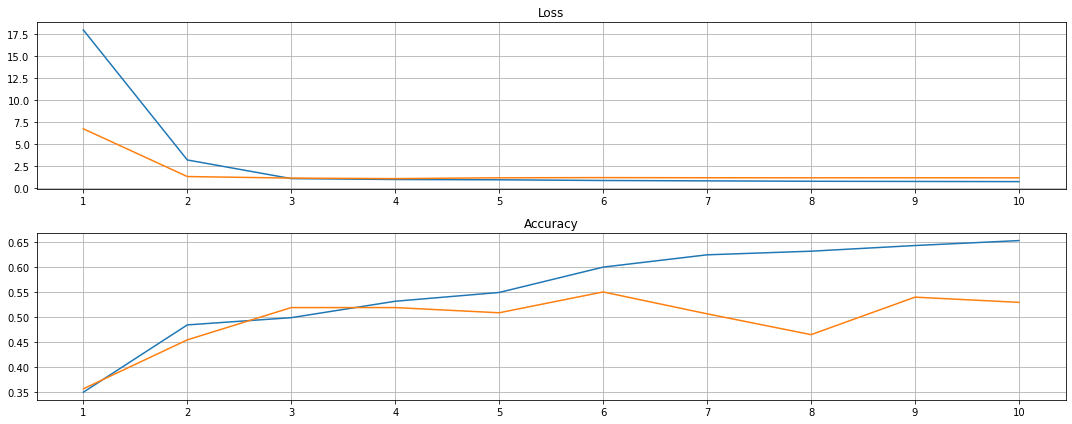

In [393]:
model.plot_history()